faradayrotator_doublepass_main.py

Ein
[[1]
 [0]]



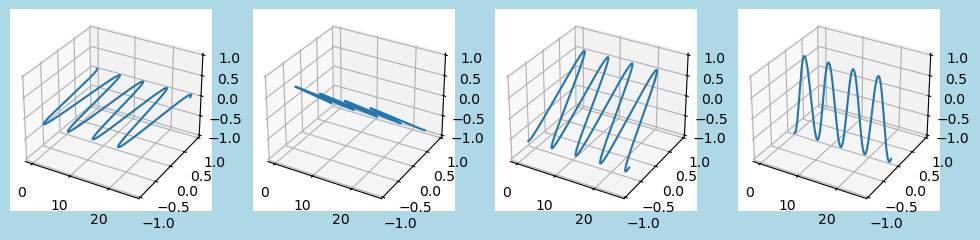

In [1]:

#faradayrotator_doublepass_main.py


print('faradayrotator_doublepass_main.py')

import numpy as np

#from scipy.fftpack import fft, fftshift
#from scipy import signal

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import Polarimeter_def

m = 512

Ein = np.array([[1],[0]])

#Ein = np.array([[0],[1]])

print('')
print('Ein')
print(Ein)
print('')

E1 = Ein
opl1_col = np.zeros(m);
E1x_col = np.zeros(m);
E1y_col = np.zeros(m);

for ii in range(m):

    opl1 = 0.05 * ii
    opl1_col[ii] = opl1   

    E1_propagate=Polarimeter_def.propagate(opl1,Ein)

    E1x_col[ii] = np.real(E1_propagate[0,0])   
    E1y_col[ii] = np.real(E1_propagate[1,0])



#Faraday Rotator

theta2 = 45 # Angle in XY plane


E2 = Polarimeter_def.faradayrotaor(theta2, E1)

#print('Eout = E2 =:')
#print(Eout)
#print('')

opl2_col = np.zeros(m);
E2x_col = np.zeros(m);
E2y_col = np.zeros(m);

for ii in range(m):
    opl2 = 0.05 * ii
    opl2_col[ii] = opl2   

    E2_propagate=Polarimeter_def.propagate(opl2,E2)

    E2x_col[ii] = np.real(E2_propagate[0,0])   
    E2y_col[ii] = np.real(E2_propagate[1,0])



# Reflection and propagate

opl3_col = np.zeros(m);
E3x_col = np.zeros(m);
E3y_col = np.zeros(m);


E3 = Polarimeter_def.reflect(E2)

for ii in range(m):

    opl3 = 0.05 * ii

    opl3_col[ii] = opl3

    E3_propagate=Polarimeter_def.propagate(opl3,E3)

    E3x_col[ii] = np.real(E3_propagate[0,0])   
    E3y_col[ii] = np.real(E3_propagate[1,0])



# Doube pass


theta3 = -1 * theta2


E4 = Polarimeter_def.faradayrotaor(theta3,E3)

E4x_col = np.zeros(m);
E4y_col = np.zeros(m);
opl4_col = np.zeros(m);

for ii in range(m):

    opl4 = 0.05 * ii

    opl4_col[ii] = opl4

    E4_propagate=Polarimeter_def.propagate(opl4,E4)

    E4x_col[ii] = np.real(E4_propagate[0,0])   
    E4y_col[ii] = np.real(E4_propagate[1,0])


#n = 2048
#thetacol = np.zeros(n);
#PX_qwpcol = np.zeros(n);


# Assume QWP

#phase_qwp = 90 # degree. QWP


#for jj in range(n):
    
 #   theta_var = 0.5 * jj

  #  Eout_qwp = Polarimeter_def.waveplate(phase_qwp,theta_var,Eout)
    
   # thetacol[jj]=theta_var
   # PX_qwpcol[jj] = abs(Eout_qwp[0,0])**2 # Linear Polarization Component





fig = plt.figure(figsize = (12,4), facecolor='lightblue')
#ax1 = plt.axes(projection = '3d')
ax1 = fig.add_subplot(1,4,1,projection = '3d')
ax1.plot3D(opl1_col,E1x_col, E1y_col)
ax1.set_zlim(-1,1)
ax1.set_ylim(-1,1)
#ax1.set_title('3d plot');




ax2 = fig.add_subplot(1,4,2,projection = '3d')
ax2.plot3D(opl2_col,E2x_col, E2y_col)
ax2.set_zlim(-1,1)
ax2.set_ylim(-1,1)

ax3 = fig.add_subplot(1,4,3,projection = '3d')
ax3.plot3D(opl3_col,E3x_col, E3y_col)
ax3.set_zlim(-1,1)
ax3.set_ylim(-1,1)

ax4 = fig.add_subplot(1,4,4,projection = '3d')
ax4.plot3D(opl4_col,E4x_col, E4y_col)
ax4.set_zlim(-1,1)
ax4.set_ylim(-1,1)

plt.show()